In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# # Keras
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.models import Sequential
# from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
# from keras import utils
# from keras.callbacks import ReduceLROnPlateau, EarlyStopping
#from keras.utils.data_utils import pad_sequences

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
from collections import Counter
import logging
import time
import pickle
import itertools

In [2]:
data = pd.read_csv('ntweets.csv')

In [3]:
data.head(10)

,id,created_at,text,user,retweets,favorites,date
0,1.630000e+18,3/1/2023 19:10,"Hey, @Doritos , I stumbled across this again! ...",TheWyattParker,0,0,NaN
1,1.630000e+18,3/1/2023 17:22,RT @hellomarii: NEW VIDEO ALERT!\nTake 2 minut...,Harper_7784,1,0,NaN
2,1.630000e+18,3/1/2023 16:48,The 15-second spot created a buzz during the m...,brandireagency,0,0,NaN
3,1.630000e+18,3/1/2023 16:47,2. It created an ingenious touchpoint. The str...,brandireagency,0,0,NaN
4,1.630000e+18,2/28/2023 18:03,The Big Game isn’t the only platform for attra...,WakeUpWetsfair,0,1,NaN
5,1.630000e+18,2/28/2023 17:54,RT @NConservatarian: Christian group buys #Sup...,Jenna_Kellie26,1,0,NaN
6,1.630000e+18,2/28/2023 4:25,RT @RicksVault: Who's does #Laundry? \n#natura...,RicksVault,2,0,NaN
7,1.630000e+18,2/27/2023 21:39,Comment below to share your thoughts when you ...,PeterTGilroy,0,0,NaN
8,1.630000e+18,2/27/2023 21:01,What did you think of the ads during this year...,CRMCRetail,0,0,NaN
9,1.630000e+18,2/27/2023 16:15,Market Ready Index® rescored the @Adweek Top 1...,MarketReadyIndx,0,0,NaN


In [4]:
data.tail(5)

,id,created_at,text,user,retweets,favorites,date
154883,1.640000e+18,4/7/2023 16:57,The Super Bowl is known for their unique comme...,oyeintelligence,0,0,4/7/2023
154884,1.640000e+18,4/7/2023 16:57,The Super Bowl is known for their unique comme...,oyeintelligence,0,0,4/7/2023
154885,1.640000e+18,4/7/2023 16:57,The Super Bowl is known for their unique comme...,oyeintelligence,0,0,4/7/2023
154886,1.640000e+18,4/7/2023 16:57,The Super Bowl is known for their unique comme...,oyeintelligence,0,0,4/7/2023
154887,1.640000e+18,4/7/2023 16:57,The Super Bowl is known for their unique comme...,oyeintelligence,0,0,4/7/2023


In [5]:
data.shape

(154888, 7)

In [6]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt  

In [7]:
data['tweet'] = np.vectorize(remove_pattern)(data['text'], "@[\w]*") 
data.head(10)

,id,created_at,text,user,retweets,favorites,date,tweet
0,1.630000e+18,3/1/2023 19:10,"Hey, @Doritos , I stumbled across this again! ...",TheWyattParker,0,0,NaN,"Hey, , I stumbled across this again! had forg..."
1,1.630000e+18,3/1/2023 17:22,RT @hellomarii: NEW VIDEO ALERT!\nTake 2 minut...,Harper_7784,1,0,NaN,RT : NEW VIDEO ALERT!\nTake 2 minutes and chec...
2,1.630000e+18,3/1/2023 16:48,The 15-second spot created a buzz during the m...,brandireagency,0,0,NaN,The 15-second spot created a buzz during the m...
3,1.630000e+18,3/1/2023 16:47,2. It created an ingenious touchpoint. The str...,brandireagency,0,0,NaN,2. It created an ingenious touchpoint. The str...
4,1.630000e+18,2/28/2023 18:03,The Big Game isn’t the only platform for attra...,WakeUpWetsfair,0,1,NaN,The Big Game isn’t the only platform for attra...
5,1.630000e+18,2/28/2023 17:54,RT @NConservatarian: Christian group buys #Sup...,Jenna_Kellie26,1,0,NaN,RT : Christian group buys #SuperBowl2023 ad ti...
6,1.630000e+18,2/28/2023 4:25,RT @RicksVault: Who's does #Laundry? \n#natura...,RicksVault,2,0,NaN,RT : Who's does #Laundry? \n#natural alt\n#nat...
7,1.630000e+18,2/27/2023 21:39,Comment below to share your thoughts when you ...,PeterTGilroy,0,0,NaN,Comment below to share your thoughts when you ...
8,1.630000e+18,2/27/2023 21:01,What did you think of the ads during this year...,CRMCRetail,0,0,NaN,What did you think of the ads during this year...
9,1.630000e+18,2/27/2023 16:15,Market Ready Index® rescored the @Adweek Top 1...,MarketReadyIndx,0,0,NaN,Market Ready Index® rescored the Top 10 #Supe...


In [8]:
data['tweet'] = data['tweet'].str.replace("[^a-zA-Z#]", " ") 
data.head(10)

C:\Users\admin\AppData\Local\Temp/ipykernel_15876/1429812712.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['tweet'] = data['tweet'].str.replace("[^a-zA-Z#]", " ")


,id,created_at,text,user,retweets,favorites,date,tweet
0,1.630000e+18,3/1/2023 19:10,"Hey, @Doritos , I stumbled across this again! ...",TheWyattParker,0,0,NaN,Hey I stumbled across this again had forg...
1,1.630000e+18,3/1/2023 17:22,RT @hellomarii: NEW VIDEO ALERT!\nTake 2 minut...,Harper_7784,1,0,NaN,RT NEW VIDEO ALERT Take minutes and check...
2,1.630000e+18,3/1/2023 16:48,The 15-second spot created a buzz during the m...,brandireagency,0,0,NaN,The second spot created a buzz during the m...
3,1.630000e+18,3/1/2023 16:47,2. It created an ingenious touchpoint. The str...,brandireagency,0,0,NaN,It created an ingenious touchpoint The str...
4,1.630000e+18,2/28/2023 18:03,The Big Game isn’t the only platform for attra...,WakeUpWetsfair,0,1,NaN,The Big Game isn t the only platform for attra...
5,1.630000e+18,2/28/2023 17:54,RT @NConservatarian: Christian group buys #Sup...,Jenna_Kellie26,1,0,NaN,RT Christian group buys #SuperBowl ad ti...
6,1.630000e+18,2/28/2023 4:25,RT @RicksVault: Who's does #Laundry? \n#natura...,RicksVault,2,0,NaN,RT Who s does #Laundry #natural alt #natur...
7,1.630000e+18,2/27/2023 21:39,Comment below to share your thoughts when you ...,PeterTGilroy,0,0,NaN,Comment below to share your thoughts when you ...
8,1.630000e+18,2/27/2023 21:01,What did you think of the ads during this year...,CRMCRetail,0,0,NaN,What did you think of the ads during this year...
9,1.630000e+18,2/27/2023 16:15,Market Ready Index® rescored the @Adweek Top 1...,MarketReadyIndx,0,0,NaN,Market Ready Index rescored the Top #Supe...


In [9]:
data['tweet'] = data['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


In [10]:
data.head(5)


,id,created_at,text,user,retweets,favorites,date,tweet
0,1.630000e+18,3/1/2023 19:10,"Hey, @Doritos , I stumbled across this again! ...",TheWyattParker,0,0,NaN,stumbled across this again forgotten about Wil...
1,1.630000e+18,3/1/2023 17:22,RT @hellomarii: NEW VIDEO ALERT!\nTake 2 minut...,Harper_7784,1,0,NaN,VIDEO ALERT Take minutes check while watching ...
2,1.630000e+18,3/1/2023 16:48,The 15-second spot created a buzz during the m...,brandireagency,0,0,NaN,second spot created buzz during most watched s...
3,1.630000e+18,3/1/2023 16:47,2. It created an ingenious touchpoint. The str...,brandireagency,0,0,NaN,created ingenious touchpoint streaming market ...
4,1.630000e+18,2/28/2023 18:03,The Big Game isn’t the only platform for attra...,WakeUpWetsfair,0,1,NaN,Game only platform attracting wide attention #...


In [11]:
tokenized_tweet = data['tweet'].apply(lambda x: x.split()) # tokenizing 
tokenized_tweet.head()

0    [stumbled, across, this, again, forgotten, abo...
1    [VIDEO, ALERT, Take, minutes, check, while, wa...
2    [second, spot, created, buzz, during, most, wa...
3    [created, ingenious, touchpoint, streaming, ma...
4    [Game, only, platform, attracting, wide, atten...
Name: tweet, dtype: object

In [12]:
from nltk.stem.porter import * 

stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 

In [13]:
tokenized_tweet.head()

0    [stumbl, across, thi, again, forgotten, about,...
1    [video, alert, take, minut, check, while, watc...
2    [second, spot, creat, buzz, dure, most, watch,...
3    [creat, ingeni, touchpoint, stream, market, co...
4    [game, onli, platform, attract, wide, attent, ...
Name: tweet, dtype: object

In [14]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
data['tweet'] = tokenized_tweet

In [15]:
# function to collect hashtags 
def hashtag_extract(x):    
    hashtags = []    
    # Loop over the words in the tweet    
    for i in x:        
        ht = re.findall(r"#(\w+)", i)        
        hashtags.append(ht)     
    
    return hashtags


In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

C:\Users\admin\anaconda3\envs\ML\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [17]:
data.head(5)

,id,created_at,text,user,retweets,favorites,date,tweet
0,1.630000e+18,3/1/2023 19:10,"Hey, @Doritos , I stumbled across this again! ...",TheWyattParker,0,0,NaN,stumbl across thi again forgotten about will h...
1,1.630000e+18,3/1/2023 17:22,RT @hellomarii: NEW VIDEO ALERT!\nTake 2 minut...,Harper_7784,1,0,NaN,video alert take minut check while watch #supe...
2,1.630000e+18,3/1/2023 16:48,The 15-second spot created a buzz during the m...,brandireagency,0,0,NaN,second spot creat buzz dure most watch sport e...
3,1.630000e+18,3/1/2023 16:47,2. It created an ingenious touchpoint. The str...,brandireagency,0,0,NaN,creat ingeni touchpoint stream market competit...
4,1.630000e+18,2/28/2023 18:03,The Big Game isn’t the only platform for attra...,WakeUpWetsfair,0,1,NaN,game onli platform attract wide attent #superb...


In [18]:
nltk.download('vader_lexicon')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]

In [20]:
data.head(50)

,id,created_at,text,user,retweets,favorites,date,tweet,Positive,Negative,Neutral
0,1.630000e+18,3/1/2023 19:10,"Hey, @Doritos , I stumbled across this again! ...",TheWyattParker,0,0,NaN,stumbl across thi again forgotten about will h...,0.295,0.100,0.605
1,1.630000e+18,3/1/2023 17:22,RT @hellomarii: NEW VIDEO ALERT!\nTake 2 minut...,Harper_7784,1,0,NaN,video alert take minut check while watch #supe...,0.370,0.000,0.630
2,1.630000e+18,3/1/2023 16:48,The 15-second spot created a buzz during the m...,brandireagency,0,0,NaN,second spot creat buzz dure most watch sport e...,0.130,0.000,0.870
3,1.630000e+18,3/1/2023 16:47,2. It created an ingenious touchpoint. The str...,brandireagency,0,0,NaN,creat ingeni touchpoint stream market competit...,0.205,0.000,0.795
4,1.630000e+18,2/28/2023 18:03,The Big Game isn’t the only platform for attra...,WakeUpWetsfair,0,1,NaN,game onli platform attract wide attent #superb...,0.134,0.000,0.866
5,1.630000e+18,2/28/2023 17:54,RT @NConservatarian: Christian group buys #Sup...,Jenna_Kellie26,1,0,NaN,christian group buy #superbowl time promot acc...,0.237,0.000,0.763
6,1.630000e+18,2/28/2023 4:25,RT @RicksVault: Who's does #Laundry? \n#natura...,RicksVault,2,0,NaN,doe #laundri #natur #naturalaltern #superbowla...,0.000,0.000,1.000
7,1.630000e+18,2/27/2023 21:39,Comment below to share your thoughts when you ...,PeterTGilroy,0,0,NaN,comment below share your thought when thi logo...,0.084,0.000,0.916
8,1.630000e+18,2/27/2023 21:01,What did you think of the ads during this year...,CRMCRetail,0,0,NaN,what think dure thi year http cxwqmqt #superbo...,0.000,0.000,1.000
9,1.630000e+18,2/27/2023 16:15,Market Ready Index® rescored the @Adweek Top 1...,MarketReadyIndx,0,0,NaN,market readi index rescor #superbowlad predict...,0.258,0.000,0.742


In [21]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]

In [22]:
data.head(50)

,id,created_at,text,user,retweets,favorites,date,tweet,Positive,Negative,Neutral
0,1.630000e+18,3/1/2023 19:10,"Hey, @Doritos , I stumbled across this again! ...",TheWyattParker,0,0,NaN,stumbl across thi again forgotten about will h...,0.236,0.190,0.575
1,1.630000e+18,3/1/2023 17:22,RT @hellomarii: NEW VIDEO ALERT!\nTake 2 minut...,Harper_7784,1,0,NaN,video alert take minut check while watch #supe...,0.180,0.000,0.820
2,1.630000e+18,3/1/2023 16:48,The 15-second spot created a buzz during the m...,brandireagency,0,0,NaN,second spot creat buzz dure most watch sport e...,0.102,0.000,0.898
3,1.630000e+18,3/1/2023 16:47,2. It created an ingenious touchpoint. The str...,brandireagency,0,0,NaN,creat ingeni touchpoint stream market competit...,0.383,0.000,0.617
4,1.630000e+18,2/28/2023 18:03,The Big Game isn’t the only platform for attra...,WakeUpWetsfair,0,1,NaN,game onli platform attract wide attent #superb...,0.128,0.000,0.872
5,1.630000e+18,2/28/2023 17:54,RT @NConservatarian: Christian group buys #Sup...,Jenna_Kellie26,1,0,NaN,christian group buy #superbowl time promot acc...,0.150,0.214,0.636
6,1.630000e+18,2/28/2023 4:25,RT @RicksVault: Who's does #Laundry? \n#natura...,RicksVault,2,0,NaN,doe #laundri #natur #naturalaltern #superbowla...,0.000,0.000,1.000
7,1.630000e+18,2/27/2023 21:39,Comment below to share your thoughts when you ...,PeterTGilroy,0,0,NaN,comment below share your thought when thi logo...,0.115,0.000,0.885
8,1.630000e+18,2/27/2023 21:01,What did you think of the ads during this year...,CRMCRetail,0,0,NaN,what think dure thi year http cxwqmqt #superbo...,0.000,0.000,1.000
9,1.630000e+18,2/27/2023 16:15,Market Ready Index® rescored the @Adweek Top 1...,MarketReadyIndx,0,0,NaN,market readi index rescor #superbowlad predict...,0.000,0.000,1.000


In [23]:
# define a function to replace values
def replace_value(row):
    if row['Neutral'] > row[['Positive', 'Negative']].max():
        return 1
    elif row['Neutral'] < row[['Positive', 'Negative']].min():
        return 0
    else:
        return row['Neutral']


In [24]:
data['Neutral'] = data.apply(replace_value, axis=1)


In [25]:
# define a function to replace values
def replace_value(row):
    if row['Negative'] > row[['Positive', 'Neutral']].max():
        return 2
    elif row['Negative'] < row[['Positive', 'Neutral']].min():
        return 0
    else:
        return row['Negative']

In [26]:
data['Negative'] = data.apply(replace_value, axis=1)


In [27]:
# define a function to replace values
def replace_value(row):
    if row['Positive'] > row[['Negative', 'Neutral']].max():
        return 3
    elif row['Positive'] < row[['Negative', 'Neutral']].min():
        return 0
    else:
        return row['Positive']

In [28]:
data['Positive'] = data.apply(replace_value, axis=1)


In [29]:
data.head(10)

,id,created_at,text,user,retweets,favorites,date,tweet,Positive,Negative,Neutral
0,1.630000e+18,3/1/2023 19:10,"Hey, @Doritos , I stumbled across this again! ...",TheWyattParker,0,0,NaN,stumbl across thi again forgotten about will h...,0.236,0.000,1.0
1,1.630000e+18,3/1/2023 17:22,RT @hellomarii: NEW VIDEO ALERT!\nTake 2 minut...,Harper_7784,1,0,NaN,video alert take minut check while watch #supe...,0.180,0.000,1.0
2,1.630000e+18,3/1/2023 16:48,The 15-second spot created a buzz during the m...,brandireagency,0,0,NaN,second spot creat buzz dure most watch sport e...,0.102,0.000,1.0
3,1.630000e+18,3/1/2023 16:47,2. It created an ingenious touchpoint. The str...,brandireagency,0,0,NaN,creat ingeni touchpoint stream market competit...,0.383,0.000,1.0
4,1.630000e+18,2/28/2023 18:03,The Big Game isn’t the only platform for attra...,WakeUpWetsfair,0,1,NaN,game onli platform attract wide attent #superb...,0.128,0.000,1.0
5,1.630000e+18,2/28/2023 17:54,RT @NConservatarian: Christian group buys #Sup...,Jenna_Kellie26,1,0,NaN,christian group buy #superbowl time promot acc...,0.000,0.214,1.0
6,1.630000e+18,2/28/2023 4:25,RT @RicksVault: Who's does #Laundry? \n#natura...,RicksVault,2,0,NaN,doe #laundri #natur #naturalaltern #superbowla...,0.000,0.000,1.0
7,1.630000e+18,2/27/2023 21:39,Comment below to share your thoughts when you ...,PeterTGilroy,0,0,NaN,comment below share your thought when thi logo...,0.115,0.000,1.0
8,1.630000e+18,2/27/2023 21:01,What did you think of the ads during this year...,CRMCRetail,0,0,NaN,what think dure thi year http cxwqmqt #superbo...,0.000,0.000,1.0
9,1.630000e+18,2/27/2023 16:15,Market Ready Index® rescored the @Adweek Top 1...,MarketReadyIndx,0,0,NaN,market readi index rescor #superbowlad predict...,0.000,0.000,1.0


In [30]:
def replace_value(x):
    if x < 1:
        return 0
    else:
        return x

In [31]:
data['Neutral'] = data['Neutral'].apply(replace_value)


In [32]:
def replace_value(x):
    if x < 2:
        return 0
    else:
        return x

In [33]:
data['Negative'] = data['Negative'].apply(replace_value)



In [34]:
def replace_value(x):
    if x < 3:
        return 0
    else:
        return x

In [35]:
data['Positive'] = data['Positive'].apply(replace_value)


In [36]:
data.head(10)

,id,created_at,text,user,retweets,favorites,date,tweet,Positive,Negative,Neutral
0,1.630000e+18,3/1/2023 19:10,"Hey, @Doritos , I stumbled across this again! ...",TheWyattParker,0,0,NaN,stumbl across thi again forgotten about will h...,0.0,0.0,1.0
1,1.630000e+18,3/1/2023 17:22,RT @hellomarii: NEW VIDEO ALERT!\nTake 2 minut...,Harper_7784,1,0,NaN,video alert take minut check while watch #supe...,0.0,0.0,1.0
2,1.630000e+18,3/1/2023 16:48,The 15-second spot created a buzz during the m...,brandireagency,0,0,NaN,second spot creat buzz dure most watch sport e...,0.0,0.0,1.0
3,1.630000e+18,3/1/2023 16:47,2. It created an ingenious touchpoint. The str...,brandireagency,0,0,NaN,creat ingeni touchpoint stream market competit...,0.0,0.0,1.0
4,1.630000e+18,2/28/2023 18:03,The Big Game isn’t the only platform for attra...,WakeUpWetsfair,0,1,NaN,game onli platform attract wide attent #superb...,0.0,0.0,1.0
5,1.630000e+18,2/28/2023 17:54,RT @NConservatarian: Christian group buys #Sup...,Jenna_Kellie26,1,0,NaN,christian group buy #superbowl time promot acc...,0.0,0.0,1.0
6,1.630000e+18,2/28/2023 4:25,RT @RicksVault: Who's does #Laundry? \n#natura...,RicksVault,2,0,NaN,doe #laundri #natur #naturalaltern #superbowla...,0.0,0.0,1.0
7,1.630000e+18,2/27/2023 21:39,Comment below to share your thoughts when you ...,PeterTGilroy,0,0,NaN,comment below share your thought when thi logo...,0.0,0.0,1.0
8,1.630000e+18,2/27/2023 21:01,What did you think of the ads during this year...,CRMCRetail,0,0,NaN,what think dure thi year http cxwqmqt #superbo...,0.0,0.0,1.0
9,1.630000e+18,2/27/2023 16:15,Market Ready Index® rescored the @Adweek Top 1...,MarketReadyIndx,0,0,NaN,market readi index rescor #superbowlad predict...,0.0,0.0,1.0


In [37]:
data['label'] = data[['Positive', 'Negative', 'Neutral']].sum(axis=1)


In [38]:
data.head(5)

,id,created_at,text,user,retweets,favorites,date,tweet,Positive,Negative,Neutral,label
0,1.630000e+18,3/1/2023 19:10,"Hey, @Doritos , I stumbled across this again! ...",TheWyattParker,0,0,NaN,stumbl across thi again forgotten about will h...,0.0,0.0,1.0,1.0
1,1.630000e+18,3/1/2023 17:22,RT @hellomarii: NEW VIDEO ALERT!\nTake 2 minut...,Harper_7784,1,0,NaN,video alert take minut check while watch #supe...,0.0,0.0,1.0,1.0
2,1.630000e+18,3/1/2023 16:48,The 15-second spot created a buzz during the m...,brandireagency,0,0,NaN,second spot creat buzz dure most watch sport e...,0.0,0.0,1.0,1.0
3,1.630000e+18,3/1/2023 16:47,2. It created an ingenious touchpoint. The str...,brandireagency,0,0,NaN,creat ingeni touchpoint stream market competit...,0.0,0.0,1.0,1.0
4,1.630000e+18,2/28/2023 18:03,The Big Game isn’t the only platform for attra...,WakeUpWetsfair,0,1,NaN,game onli platform attract wide attent #superb...,0.0,0.0,1.0,1.0


In [39]:
data["label"].value_counts()


1.0    131813
3.0     22366
2.0       549
0.0       160
Name: label, dtype: int64

In [40]:
data['label'] = data['label'].replace(1.0, 1)
data['label'] = data['label'].replace(2.0, 2)
data['label'] = data['label'].replace(3.0, 3)
data['label'] = data['label'].replace(0.0, 2)


In [41]:
data["label"].value_counts()


1.0    131813
3.0     22366
2.0       709
Name: label, dtype: int64

In [42]:
data['label'] = data['label'].astype(int)


In [43]:
data["label"].value_counts()


1    131813
3     22366
2       709
Name: label, dtype: int64

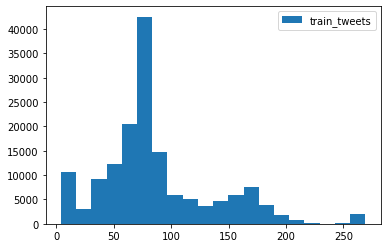

In [44]:
length_train = data['tweet'].str.len() 
plt.hist(length_train, bins=20, label="train_tweets") 
plt.legend() 
plt.show()

In [45]:
normal_words =' '.join([text for text in data['tweet'][data['label'] == 1]]) 


In [46]:
from nltk.probability import FreqDist
fdist = FreqDist(normal_words)


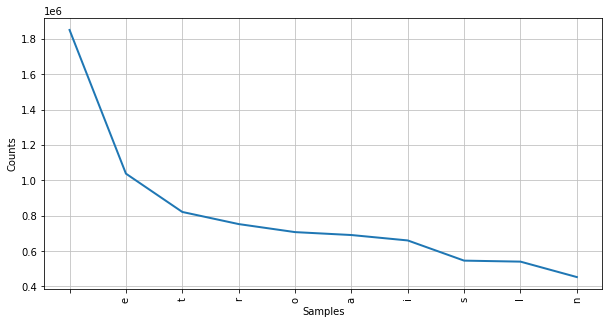

In [47]:
n = 10  # set the number of tokens to plot
plt.figure(figsize=(10, 5))
fdist.plot(n, cumulative=False)
plt.show()

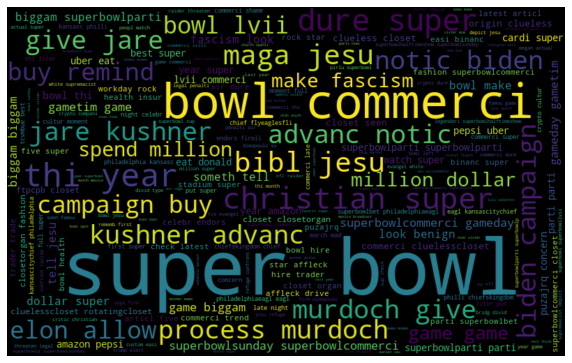

In [48]:
from wordcloud import WordCloud 

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

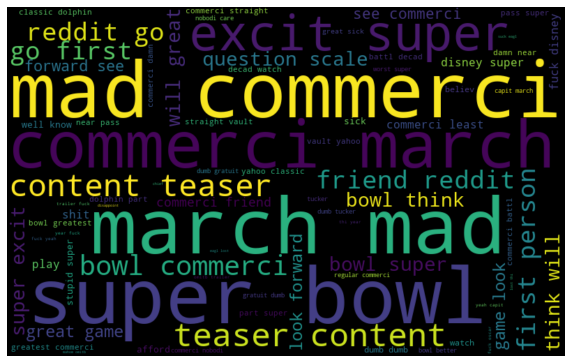

In [49]:
normal_words =' '.join([text for text in data['tweet'][data['label'] == 2]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

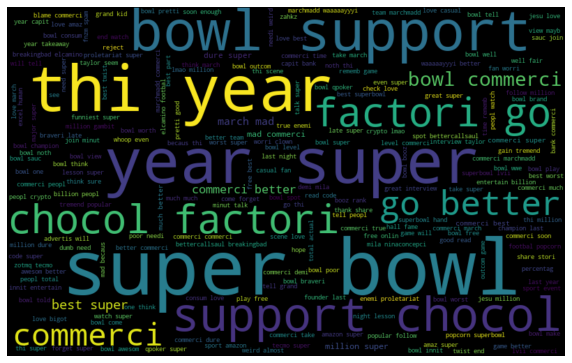

In [50]:
normal_words =' '.join([text for text in data['tweet'][data['label'] == 3]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [51]:
# function to collect hashtags 
def hashtag_extract(x):    
    hashtags = []    
    # Loop over the words in the tweet    
    for i in x:        
        ht = re.findall(r"#(\w+)", i)        
        hashtags.append(ht)     
    
    return hashtags

In [52]:
# extracting hashtags from non racist/sexist tweets 
hashtags_p = hashtag_extract(data['tweet'][data['label'] == 3]) 
# extracting hashtags from racist/sexist tweets 
hashtags_neg = hashtag_extract(data['tweet'][data['label'] == 2]) 
HT_neutral = hashtag_extract(data['tweet'][data['label'] == 1]) 
# unnesting list 
hashtags_p = sum(hashtags_p,[]) 
hashtags_neg = sum(hashtags_neg,[])
HT_neutral = sum(HT_neutral,[])

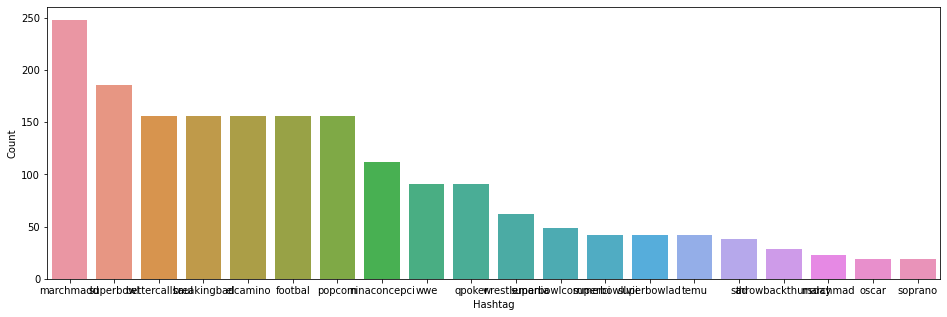

In [53]:
import seaborn as sns 

a = nltk.FreqDist(hashtags_p) 
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

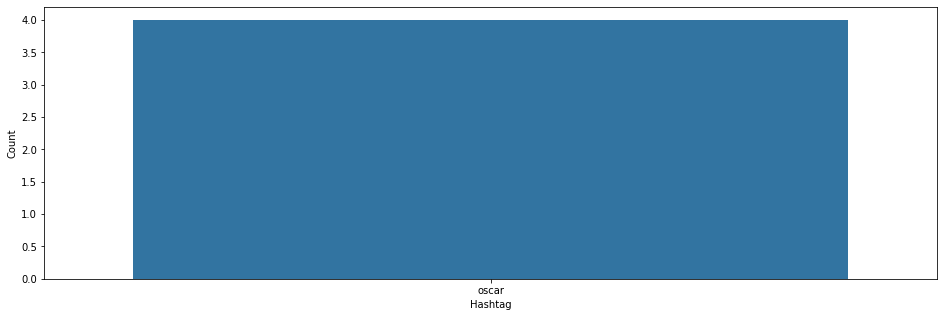

In [54]:
a = nltk.FreqDist(hashtags_neg) 
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

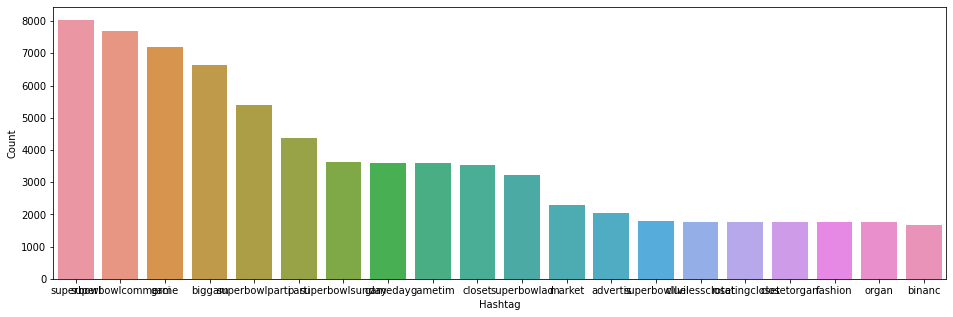

In [55]:
a = nltk.FreqDist(HT_neutral) 
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

In [56]:
bow_vectorizer = CountVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words='english') 
bow = bow_vectorizer.fit_transform(data['tweet']) 
bow.shape

(154888, 1000)

In [57]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(data['tweet']) 
tfidf.shape

(154888, 1000)

In [58]:
tokenized_tweet = data['tweet'].apply(lambda x: x.split())
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,            
            window=5, 
            min_count=2,
            sg = 1, 
            hs = 0,
            negative = 10, 
            workers= 2, 
            seed = 34) 
model_w2v.train(tokenized_tweet, total_examples= len(data['tweet']), epochs=20)

(31293847, 41942180)

In [59]:
model_w2v.wv.most_similar(positive="bowl")


[('super', 0.9962077736854553),
 ('commerci', 0.635571300983429),
 ('telecast', 0.45700153708457947),
 ('bag', 0.45284050703048706),
 ('indu', 0.4514802396297455),
 ('revlon', 0.44480249285697937),
 ('gochx', 0.42026057839393616),
 ('coinba', 0.4104969799518585),
 ('rvsoch', 0.41034433245658875),
 ('wassup', 0.40572497248649597)]

In [68]:
from sklearn import svm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

In [69]:
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow, data['label'], random_state=412, test_size=0.3)


In [86]:
xtrain_bow.shape

(108421, 1000)

In [72]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [73]:
rbf =svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(xtrain_bow, ytrain)


In [74]:
rbf_pred = rbf.predict(xvalid_bow)


In [75]:
rbf_accuracy = accuracy_score(yvalid, rbf_pred)


In [76]:
rbf_f1 = f1_score(yvalid, rbf_pred, average='weighted')


In [77]:
print('Accuracy: ', "%.2f" % (rbf_accuracy*100))
print('F1: ', "%.2f" % (rbf_f1*100))

Accuracy:  99.29
F1:  99.28


In [78]:
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svc, file)

In [93]:
from sklearn.ensemble import RandomForestClassifier


In [116]:
tfidf_vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

In [94]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain) 
prediction = rf.predict(xvalid_bow) 
# validation score 


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [95]:
f1_score(yvalid, prediction, average='weighted')

0.9974442404378985

In [96]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain) 
prediction = xgb_model.predict(xvalid_bow) 


C:\Users\admin\anaconda3\envs\ML\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\admin\anaconda3\envs\ML\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:44:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [99]:
f1_score(yvalid, prediction, average='weighted')

0.9966378455977105

In [100]:
import pickle

# Load the saved model from a file
with open('svm_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [112]:
tweets= ["superbowl was good"]

In [117]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the SVM model and TF-IDF vectorizer
svm_model = joblib.load('svm_model.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

In [118]:
text = "This is a sample text to classify."

# Preprocess the text using the same vectorizer used for training
text_vectorized = tfidf_vectorizer.transform([text])

In [119]:
predicted_class = svm_model.predict(text_vectorized)

In [120]:
predicted_class

array([1])